In [51]:
### Train and Eval code for RL model ###
from MIDI_conversion import *
from voice_leading_rules import *
import matplotlib.pyplot as plt
from models.models import *
import os 
import glob
#melody_harmonization_model import *
#from models.free_model import *
#from models.voicing_model import *
import yaml
from datetime import datetime
from tqdm import tqdm
import statistics

In [56]:
print("HARM")
harmonization_agent = HarmonizationModel() # don't care about training hyperparameters
harm_fname = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/models/harmmodelfinal_04_10_9999.p'
harm_epoch_rewards, completed_epochs = harmonization_agent.loadModel(harm_fname)
print(len(harm_epoch_rewards))

free_agent = FreeModel()
free_fname = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/models/freemodelfinal_04_12_9999.p'
free_epoch_rewards, completed_epochs = free_agent.loadModel(free_fname)
print(len(free_epoch_rewards))

voicing_agent = VoicingModel()
voicing_fname = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/models/voicingmodelfinal_04_10_9999.p'
voicing_epoch_rewards, completed_epochs = voicing_agent.loadModel(voicing_fname)
print(len(voicing_epoch_rewards))

#print(len(latesth), len(latestf), len(latestv))
#print(len(harm_rewards), len(free_rewards), len(voicing_rewards))

HARM
9999
9999
9999


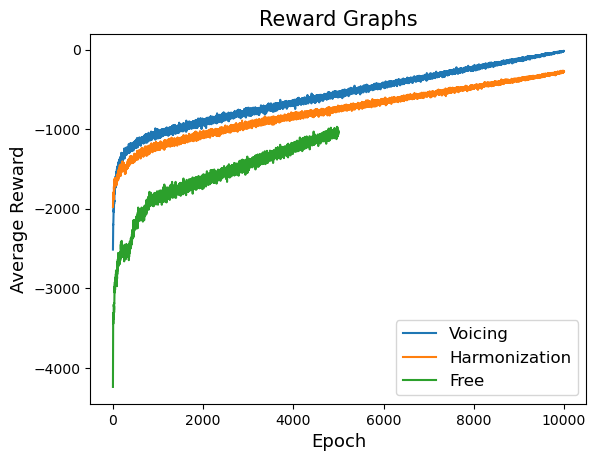

In [107]:
fig, ((ax1)) = plt.subplots(1, 1)
#fig.set_size_inches(12, 8)
#fig.suptitle("Reward Graphs", size=15)
ax1.set_title("Reward Graphs", size=15)
ax1.plot(voicing_epoch_rewards, label="Voicing")
ax1.set_ylabel("Average Reward", size=13)
ax1.set_xlabel("Epoch", size=13)
ax1.plot(harm_epoch_rewards, label="Harmonization")
ax1.plot(free_epoch_rewards, label="Free")
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.legend(fontsize=12)



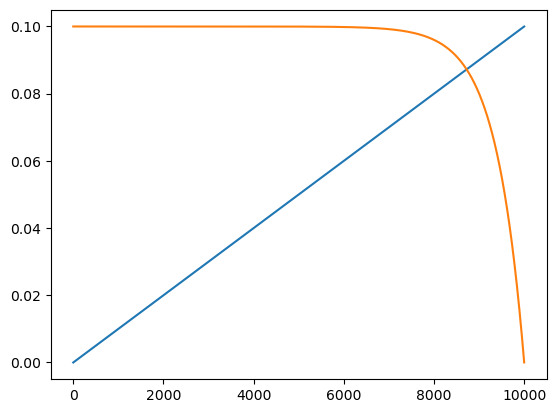

In [16]:
alpha = 0.1
total_steps = 10000 
steps = np.geomspace(0.1,0.00000001, 10000)
epoch_steps = [alpha*(k/total_steps) for k in range(total_steps)]
steps_2 = [0.1 - s for s in steps]
steps_2.reverse()
plt.plot(epoch_steps)
plt.plot(steps_2)

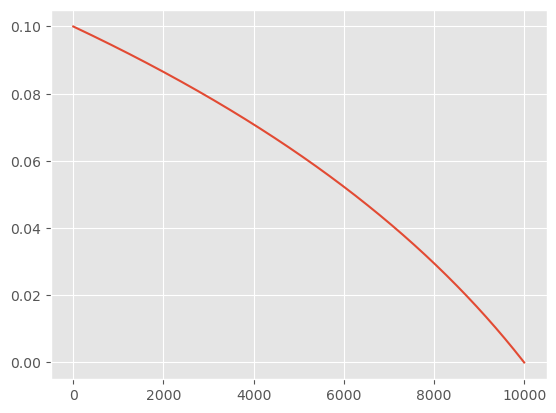

In [121]:
#steps = 
log = [alpha*np.log(step) for step in np.linspace(np.e, 1, 10000)]
#plt.plot(steps)
plt.plot(log)

In [29]:
np.linspace(np.log(np.e), np.log(1))

array([1.00000000e+00, 9.99899990e-01, 9.99799980e-01, ...,
       2.00020002e-04, 1.00010001e-04, 0.00000000e+00])

1.0

In [85]:
import pandas as pd


bach_vs_q_path = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/results/mechanicalturk_csvs/q_v_bach_results.csv'
doodle_vs_q_path = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/results/mechanicalturk_csvs/q_v_doodle_results.csv'
rand_vs_q_path = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/results/mechanicalturk_csvs/q_v_random_results.csv'

field = 'Answer.harmonization-preference.label'

bach_vs_q = pd.read_csv(bach_vs_q_path)
doodle_vs_q = pd.read_csv(doodle_vs_q_path)
rand_vs_q = pd.read_csv(rand_vs_q_path)

print("BACH")
res_series = bach_vs_q[field]
A_count = 0
B_count = 0
for i in range(250):
    res = res_series[i]
    if res == "Harmonization A":
        A_count +=1 
    else:
        B_count +=1

print("A COUNT:", A_count)
print("B COUNT:", B_count)


print("RANDOM")
res_series = rand_vs_q[field]
A_count = 0
B_count = 0
for i in range(250):
    res = res_series[i]
    if res == "Harmonization A":
        A_count +=1 
    else:
        B_count +=1

print("A COUNT:", A_count)
print("B COUNT:", B_count)


print("DOODLE")
res_series = doodle_vs_q[field]
A_count = 0
B_count = 0
for i in range(250):
    res = res_series[i]
    if res == "Harmonization A":
        A_count +=1 
    else:
        B_count +=1
print("A COUNT:", A_count)
print("B COUNT:", B_count)

BACH
A COUNT: 124
B COUNT: 126
RANDOM
A COUNT: 146
B COUNT: 104
DOODLE
A COUNT: 129
B COUNT: 121


In [88]:
import random
### CREATE INPUT CSVs FOR rand v bach, rand v doodle, doodle v bach
def gen_csvs():
    melodies, first_harms, second_harms = [],[],[]
    base_melody_url = 'https://harmonization-mturk.s3.us-east-2.amazonaws.com/melody-'
    base_random_url = 'https://harmonization-mturk.s3.us-east-2.amazonaws.com/random-'
    #base_q_url = 'https://harmonization-mturk.s3.us-east-2.amazonaws.com/mod-'
    base_doodle_url = 'https://harmonization-mturk.s3.us-east-2.amazonaws.com/doodle-'
    base_bach_url = 'https://harmonization-mturk.s3.us-east-2.amazonaws.com/bach-'
    #indices = [0,2,4,17, 18, 19, 25, 26, 27, 28, 31, 40, 41, 43, 46, 47, 51, 53, 59, 60, 63, 64, 66, 67, 70, 74, 79, 86, 99, 100, 109, 112, 117, 119, 120, 121, 122, 145, 157, 158, 159, 160, 171, 176, 179, 183, 186, 189, 192, 204, 205, 223, 239, 244, 245, 247, 248, 258, 259, 263, 270, 273, 275, 276, 280, 283, 284, 285, 287, 296, 303, 305, 308, 311, 313, 314, 315, 317, 319, 322, 323, 328, 329, 330, 332, 333, 335, 336, 341, 342, 346, 349, 350, 352, 359, 360, 361, 363, 366, 368, 370, 373]
    indices = [0,2,17, 18, 19, 25, 27, 28, 41, 43,
               51, 53, 60, 63, 64, 66, 70, 74, 86, 100,
               112, 117, 119, 122, 145, 157, 158, 160,179, 183, 
               189, 205, 223, 239, 244, 245, 247, 248, 258, 263, 
               270, 273, 275, 276, 280, 296, 305, 311, 315, 317]
    # shuffle list 
    print("NUM INDICES:", len(indices))
    random.shuffle(indices)
    first_harms = [] 
    for index in indices: 
        cur_melody_url = base_melody_url + str(index) + '.wav'
        cur_random_url = base_random_url + str(index) + '.wav'
        #cur_q_url = base_q_url + str(index) + '.wav'
        cur_doodle_url = base_doodle_url + str(index) + '.wav'
        cur_bach_url = base_bach_url + str(index) + '.wav'
        melodies.append(cur_melody_url)
        if random.random() < 0.5:
            first_harms.append(cur_doodle_url)
            second_harms.append(cur_bach_url)
        else: 
            first_harms.append(cur_bach_url)
            second_harms.append(cur_doodle_url)

    d1 = {'melody_url': melodies, 
         'first_url': first_harms,
         'second_url': second_harms
         }
    df1 = pd.DataFrame(data=d1)
    #df1.to_csv('./results/mechanicalturk_csvs/rand_v_bach_input.csv', index=False)  
    #df2.to_csv('./results/mechanicalturk_csvs/rand_v_doodle_input.csv', index=False)  
    df1.to_csv('./results/mechanicalturk_csvs/doodle_v_bach_input.csv', index=False)  

gen_csvs()

NUM INDICES: 50


In [42]:
'''BACH
A COUNT: 124
B COUNT: 126
RANDOM
A COUNT: 146
B COUNT: 104
DOODLE
A COUNT: 129
B COUNT: 121'''
import math
bach_wins = 126 + 144 + 154
Q_wins = 124 + 146 + 129 
rand_wins = 104 + 96 + 136
doodle_wins = 121 + 106 + 114
num_trials = 750

bach_p = bach_wins/num_trials
bach_sd = math.sqrt(num_trials*bach_p*(1-bach_p))
q_p = Q_wins/num_trials
q_sd = math.sqrt(num_trials*q_p*(1-q_p))
doodle_p = doodle_wins/num_trials
doodle_sd = math.sqrt(num_trials*doodle_p*(1-doodle_p))
rand_p = rand_wins/num_trials
rand_sd = math.sqrt(num_trials*rand_p*(1-rand_p))
print(bach_wins,Q_wins, doodle_wins, rand_wins)
print(bach_sd, q_sd, doodle_sd, rand_sd)

424 399 341 336
13.57566450184545 13.664991767286214 13.636666259268306 13.618810520746663


<ErrorbarContainer object of 3 artists>

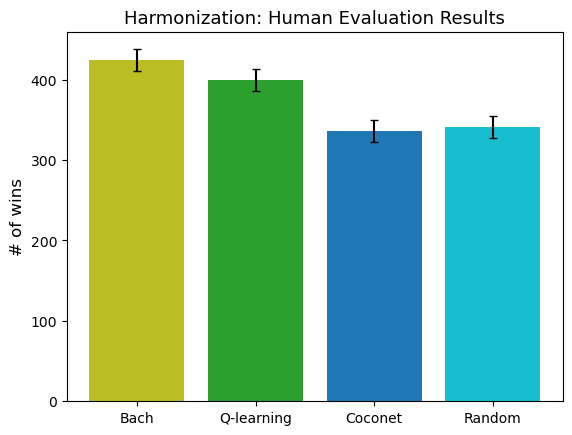

In [39]:
fig, ax = plt.subplots()
names = ["Bach", "Q-learning", "Coconet", "Random"]
wins = [bach_wins, Q_wins, rand_wins, doodle_wins]
colors = ['tab:olive', 'tab:green', 'tab:blue', 'tab:cyan']
ax.bar(names, wins, color=colors)
ax.set_ylabel("# of wins", fontsize=12)
ax.set_title("Harmonization: Human Evaluation Results", fontsize=13)
ax.errorbar(names, wins, [bach_sd,q_sd,doodle_sd,rand_sd], linestyle="None", color="black", capsize=3)


In [23]:
import pandas as pd


bach_vs_doodle_path = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/results/mechanicalturk_csvs/bach_v_doodle_results.csv'
rand_v_bach_path = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/results/mechanicalturk_csvs/random_v_bach_results.csv'
rand_v_doodle_path = '/Users/sadiela/Documents/phd/courses/courses_spring_2023/ec700reinforcementlearning/final_project/results/mechanicalturk_csvs/random_v_doodle_results.csv'

vote = 'Answer.harmonization-preference.label'
first_url = 'Input.first_url'
status = "AssignmentStatus" # Rejected


bach_vs_doodle = pd.read_csv(bach_vs_doodle_path)
bach_vs_doodle = bach_vs_doodle[[status, vote, first_url]]
print(bach_vs_doodle.head())
rand_v_bach = pd.read_csv(rand_v_bach_path)
rand_v_doodle = pd.read_csv(rand_v_doodle_path)

print(bach_vs_doodle.shape[0])

print("BACH V DOODLE")
bach_wins = 0
doodle_wins = 0
for i in range(bach_vs_doodle.shape[0]):
    if not bach_vs_doodle.iloc[i][status]== "Rejected":
        label = bach_vs_doodle.iloc[i][vote]
        url = bach_vs_doodle.iloc[i][first_url]
        print(label,url[-16:])
        if "doodle" in url:
            if label != "Harmonization A":
                bach_wins += 1 
        else:
            if label == "Harmonization A":
                bach_wins += 1  
print("BACH WINS", bach_wins)
print("DOODLE WINS:", 250-bach_wins)


  AssignmentStatus Answer.harmonization-preference.label  \
0        Submitted                       Harmonization B   
1        Submitted                       Harmonization B   
2        Submitted                       Harmonization B   
3        Submitted                       Harmonization B   
4        Submitted                       Harmonization A   

                                     Input.first_url  
0  https://harmonization-mturk.s3.us-east-2.amazo...  
1  https://harmonization-mturk.s3.us-east-2.amazo...  
2  https://harmonization-mturk.s3.us-east-2.amazo...  
3  https://harmonization-mturk.s3.us-east-2.amazo...  
4  https://harmonization-mturk.s3.us-east-2.amazo...  
252
BACH V DOODLE
Harmonization B m/doodle-179.wav
Harmonization B m/doodle-179.wav
Harmonization B m/doodle-179.wav
Harmonization B m/doodle-179.wav
Harmonization A m/doodle-179.wav
Harmonization B com/bach-275.wav
Harmonization B com/bach-275.wav
Harmonization A com/bach-275.wav
Harmonization B com/bach-27

In [27]:
rand_v_bach = pd.read_csv(rand_v_bach_path)
rand_v_doodle = pd.read_csv(rand_v_doodle_path)

print(rand_v_bach.shape[0])

print("BACH V RANDOM")
bach_wins = 0
for i in range(rand_v_bach.shape[0]):
    if not rand_v_bach.iloc[i][status]== "Rejected":
        label = rand_v_bach.iloc[i][vote]
        url = rand_v_bach.iloc[i][first_url]
        if "bach" in url:
            if label == "Harmonization A":
                bach_wins += 1 
                print(label,url[-16:], "BACH WINS")
        else:
            if label != "Harmonization A":
                print(label,url[-16:], "BACH WINS")
                bach_wins += 1  
print("BACH WINS", bach_wins)
print("RANDOM WINS:", 250-bach_wins)

257
BACH V RANDOM
Harmonization B om/random-63.wav BACH WINS
Harmonization B om/random-63.wav BACH WINS
Harmonization A com/bach-270.wav BACH WINS
Harmonization A com/bach-270.wav BACH WINS
Harmonization A com/bach-270.wav BACH WINS
Harmonization A com/bach-270.wav BACH WINS
Harmonization A com/bach-112.wav BACH WINS
Harmonization A .com/bach-25.wav BACH WINS
Harmonization A .com/bach-25.wav BACH WINS
Harmonization A .com/bach-25.wav BACH WINS
Harmonization A .com/bach-25.wav BACH WINS
Harmonization A .com/bach-25.wav BACH WINS
Harmonization B m/random-311.wav BACH WINS
Harmonization B m/random-311.wav BACH WINS
Harmonization B m/random-311.wav BACH WINS
Harmonization B m/random-311.wav BACH WINS
Harmonization B m/random-157.wav BACH WINS
Harmonization B m/random-157.wav BACH WINS
Harmonization B m/random-157.wav BACH WINS
Harmonization B om/random-28.wav BACH WINS
Harmonization A com/bach-119.wav BACH WINS
Harmonization A com/bach-119.wav BACH WINS
Harmonization B om/random-74.wav BAC

In [29]:
rand_v_bach = pd.read_csv(rand_v_bach_path)
rand_v_doodle = pd.read_csv(rand_v_doodle_path)

print(rand_v_bach.shape[0])

print("DOODLE V RANDOM")
doodle_wins = 0
for i in range(rand_v_doodle.shape[0]):
    if not rand_v_doodle.iloc[i][status]== "Rejected":
        label = rand_v_doodle.iloc[i][vote]
        url = rand_v_doodle.iloc[i][first_url]
        if "doodle" in url:
            if label == "Harmonization A":
                doodle_wins += 1 
                print(label,url[-16:], "DOODLE WINS")
        else:
            if label != "Harmonization A":
                print(label,url[-16:], "DOODLE WINS")
                doodle_wins += 1  
    else:
        print("REEEEJECTED!")
print("DOODLE WINS", doodle_wins)
print("RANDOM WINS:", 250-doodle_wins)

257
DOODLE V RANDOM
Harmonization B m/random-247.wav DOODLE WINS
Harmonization A m/doodle-223.wav DOODLE WINS
Harmonization A m/doodle-223.wav DOODLE WINS
Harmonization A m/doodle-223.wav DOODLE WINS
Harmonization B om/random-63.wav DOODLE WINS
Harmonization B om/random-63.wav DOODLE WINS
Harmonization B om/random-19.wav DOODLE WINS
Harmonization B om/random-60.wav DOODLE WINS
Harmonization B om/random-60.wav DOODLE WINS
Harmonization B om/random-60.wav DOODLE WINS
Harmonization B m/random-270.wav DOODLE WINS
Harmonization B m/random-270.wav DOODLE WINS
Harmonization B m/random-244.wav DOODLE WINS
Harmonization B m/random-244.wav DOODLE WINS
Harmonization A m/doodle-189.wav DOODLE WINS
Harmonization A m/doodle-189.wav DOODLE WINS
Harmonization A m/doodle-189.wav DOODLE WINS
Harmonization A m/doodle-189.wav DOODLE WINS
REEEEJECTED!
Harmonization B m/random-117.wav DOODLE WINS
Harmonization B m/random-117.wav DOODLE WINS
Harmonization A m/doodle-315.wav DOODLE WINS
Harmonization A m/dood

In [45]:
from scipy import stats
bach_wins = 126 + 144 + 154
Q_wins = 124 + 146 + 129 
rand_wins = 104 + 96 + 136
doodle_wins = 121 + 106 + 114
num_trials = 750

bach_sample = [1]*bach_wins + [0]*(750-bach_wins)
q_sample = [1]*Q_wins + [0]*(750-Q_wins)
rand_sample = [1]*rand_wins + [0]*(750-rand_wins)
doodle_sample = [1]*doodle_wins + [0]*(750-doodle_wins)
print(stats.kruskal(bach_sample, q_sample, rand_sample, doodle_sample))

KruskalResult(statistic=30.144615111111154, pvalue=1.286693619436198e-06)
